In [1]:
from imageNetParser import get_features, get_classes_image_net
from index import *
import matplotlib.pyplot as plt
import model
from sklearn.decomposition import PCA
from tools import accuracy, split, foreach, random_rank, random_labels, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from itertools import product
from IStructInstantiation import *
import numpy as np
from ranking import *

In [14]:
cls=1
dimpsi = 250
nb_it = 1

classes = get_classes_image_net()
print("classe évalué : ", classes[cls])

classe évalué :  ambulance


In [3]:
m = model.RankingStructModel(dimpsi)
dataset = load()
dataset = convertClassif2Ranking(dataset, cls=cls)
x_train, y_train = dataset.x_train, dataset.y_train
x_test, y_test = dataset.x_test, dataset.y_test


In [4]:
baseline = lambda x : np.random.randint(0, 2, x.shape[0])
acc = lambda pred, target : np.mean(pred == target)

baseline_train = acc(baseline(x_train), y_train)
baseline_test = acc(baseline(x_test), y_test)

print("baselines : (train : {}, test : {})".format(baseline_train, baseline_test))

baselines : (train : 0.05597222222222222, test : 0.05912811090696509)


In [15]:

classifier = model.GenericTrainingAlgorithm(dimpsi, struct_classe=RankingInstantiation, classe=model.RankingStructModel)
classifier.fit_ranking(dataset, nb_it=nb_it, alpha=1e-6, lr=10)

100%|██████████| 1/1 [01:29<00:00, 89.08s/it]


In [21]:
rank = classifier.predict(x_train)
# plot_precision_recall_curve(rank, y_train)
precision, recall = recall_precision(ranking)
average_precision(recall, precision)
# ranking = RankingOutput(rank, y_train)
# precision, recall = recall_precision(ranking)
# indexes = [i for i in range(len(precision))]

# recall_points = [i / 10 for i in range(1, 11)]
# i = 0
# indices = []
# for k, rec in enumerate(recall):
#     if rec > recall_points[i]:
#         indices.append(k)
#         i += 1
# if len(indices) != len(recall_points):
#     indices.append(-1)
# assert(len(indices) == len(recall_points))
# prec_recall = [precision[i] / recall[i] for i in indices]

TypeError: 'numpy.float64' object is not callable

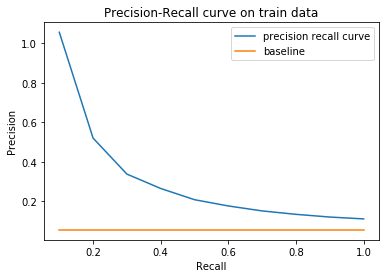

In [23]:
plt.plot(recall_points, prec_recall, label="precision recall curve")
plt.plot(recall_points, [baseline_train for _ in range(len(recall_points))], label="baseline")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve on train data")
plt.legend()
plt.show()

In [24]:
AP = average_precision(precision, recall)
print("AP : ", AP)

AP :  0.10659477391980779


In [25]:
classifier.save()

In [5]:
classifier = model.GenericTrainingAlgorithm(dimpsi, struct_classe=RankingInstantiation, classe=model.RankingStructModel)
classifier.load()

In [36]:
def points_precision_recall(precision, recall):
    recall_points = [i / 10 for i in range(1, 11)]
    indices = []
    i =0
    for k, rec in enumerate(recall):
        if rec > recall_points[i]:
            indices.append(k)
            i += 1
    if len(indices) != len(recall_points):
        indices.append(-1)
    assert(len(indices) == len(recall_points))
    pr10, rec10 = zip(*[(precision[i], recall[i]) for i in indices])
    pr10 = [1] + list(pr10)
    rec10 = [0] + list(rec10)
    return pr10, rec10

In [34]:
rank = baseline(x_train)
ranking = RankingOutput(rank, y_train)
precision, recall = recall_precision(ranking)


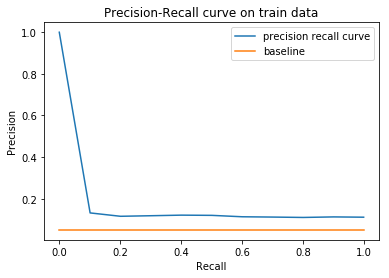

In [38]:
pr10, rec10 = points_precision_recall(precision, recall)
plot_precision_recall(rec10, pr10, 0.05)

In [7]:
rank = baseline(x_train)
ranking = RankingOutput(rank, y_train)
precision, recall = recall_precision(ranking)
indexes = [i for i in range(len(precision))]

recall_points = [i / 10 for i in range(1, 11)]
i = 0
indices = []
for k, rec in enumerate(recall):
    if rec > recall_points[i]:
        indices.append(k)
        i += 1
if len(indices) != len(recall_points):
    indices.append(-1)
assert(len(indices) == len(recall_points))
prec_recall = [precision[i] / recall[i] for i in indices]

In [36]:
prec_recall

[1.056803170409511,
 0.5201560468140441,
 0.3379805661174482,
 0.2651640702684786,
 0.20833333333333334,
 0.1766394347538088,
 0.1515151515151515,
 0.13418316001341832,
 0.12050007531254707,
 0.1111111111111111]

In [29]:
def plot_precision_recall(recall_points, prec, baseline):
    plt.plot(recall_points, prec, label="precision recall curve")
    plt.plot(recall_points, [baseline for _ in range(len(recall_points))], label="baseline")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall curve on train data")
    plt.legend()
    plt.show()

In [28]:
AP = average_precision(precision, recall)
print("AP : ", AP)

AP :  0.10665147690484358


In [32]:
def mean(it):
    return sum(it) / len(it)

In [33]:
mean(precision)

0.10605304733703282

In [40]:
from sklearn import metrics
metrics.auc(recall, precision)

0.10659477391980772